# Анализ главных компонент: характеристики зданий

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [5]:
from sklearn.decomposition import PCA

Подготовим данные к работе.

In [2]:
data = pd.read_excel('Residential-Building-Data-Set.xlsx', header=1)
data.head()

START YEAR 
 START QUARTER 
 COMPLETION YEAR 
 COMPLETION QUARTER 
 V-1 
 V-2 
 V-3 
 V-4 
 V-5 
 V-6 
 ... 
 V-22.4 
 V-23.4 
 V-24.4 
 V-25.4 
 V-26.4 
 V-27.4 
 V-28.4 
 V-29.4 
 V-9 
 V-10 
 
 
 
 
 0 
 81 
 1 
 85 
 1 
 1 
 3150.0 
 920.0 
 598.5 
 190 
 1010.84 
 ... 
 815.50 
 1755.00 
 8002.0 
 60.74 
 54.26 
 2978.26 
 41407.0 
 601988.1 
 2200 
 410 
 
 
 1 
 84 
 1 
 89 
 4 
 1 
 7600.0 
 1140.0 
 3040.0 
 400 
 963.81 
 ... 
 1316.30 
 8364.78 
 8393.0 
 90.95 
 89.79 
 11379.37 
 44835.0 
 929027.1 
 5000 
 1000 
 
 
 2 
 78 
 1 
 81 
 4 
 1 
 4800.0 
 840.0 
 480.0 
 100 
 689.84 
 ... 
 765.80 
 1755.00 
 4930.0 
 38.70 
 32.04 
 1653.06 
 37933.0 
 377828.6 
 1200 
 170 
 
 
 3 
 72 
 2 
 73 
 2 
 1 
 685.0 
 202.0 
 13.7 
 20 
 459.54 
 ... 
 152.25 
 1442.31 
 1456.0 
 9.73 
 8.34 
 686.16 
 8194.0 
 122031.7 
 165 
 30 
 
 
 4 
 87 
 1 
 90 
 2 
 1 
 3000.0 
 800.0 
 1230.0 
 410 
 631.91 
 ... 
 2244.10 
 9231.76 
 9286.0 
 136.60 
 140.20 
 9821.00 
 48260.0 
 1734973.5 
 5500 
 700 
 
 
 
 5 rows × 109 columns

In [3]:
use_data = data[['V-'+str(i) for i in range(2, 9)]]
use_data.head()

V-2 
 V-3 
 V-4 
 V-5 
 V-6 
 V-7 
 V-8 
 
 
 
 
 0 
 3150.0 
 920.0 
 598.5 
 190 
 1010.84 
 16 
 1200 
 
 
 1 
 7600.0 
 1140.0 
 3040.0 
 400 
 963.81 
 23 
 2900 
 
 
 2 
 4800.0 
 840.0 
 480.0 
 100 
 689.84 
 15 
 630 
 
 
 3 
 685.0 
 202.0 
 13.7 
 20 
 459.54 
 4 
 140 
 
 
 4 
 3000.0 
 800.0 
 1230.0 
 410 
 631.91 
 13 
 5000

<img src='houses.png' width='90%'>

In [5]:
use_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 7 columns):
V-2    372 non-null float64
V-3    372 non-null float64
V-4    372 non-null float64
V-5    372 non-null int64
V-6    372 non-null float64
V-7    372 non-null int64
V-8    372 non-null int64
dtypes: float64(4), int64(3)
memory usage: 20.4 KB


Стандартизируем данные с помощью средств библиотеки **sklearn**.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(use_data)
use_data_std = scaler.transform(use_data)
use_data_std[:10]

array([[ 0.78944291,  1.00913005,  0.48081461,  0.23904873,  1.6613049 ,
         4.64917879,  0.11250197],
       [ 3.26173749,  1.45864415,  4.81905042,  2.10649738,  1.49012235,
         7.9925816 ,  1.82192637],
       [ 1.7061364 ,  0.84567037,  0.27025515, -0.56128641,  0.49291025,
         4.17154982, -0.46065798],
       [-0.58004162, -0.45792052, -0.5583008 , -1.27269542, -0.34534921,
        -1.08236888, -0.95337443],
       [ 0.70610714,  0.76394054,  1.60291001,  2.19542351,  0.28205324,
         3.21629187,  3.93356829],
       [ 0.42832123,  0.43702119,  1.28307284,  2.28434964,  0.33814346,
         2.7386629 ,  3.73245953],
       [ 0.04497667,  0.13462079,  1.47568589,  4.24072442,  1.05395808,
         2.26103393,  4.63744893],
       [-0.32170072, -0.09422275,  0.4390581 ,  2.99575865,  0.13198186,
        -0.12711094,  4.23523142],
       [ 0.21164822,  0.2326966 , -0.24521576, -0.65021254,  0.64687628,
        -0.60473991, -0.40032536],
       [ 0.72277429,  1.0295

Попробуем перейти в двумерное пространство.

In [8]:
pca = PCA(n_components=7)
pca.fit(use_data_std)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.singular_values_

array([ 34.57570439,  23.72145684,  19.49889295,  17.44013776,
         9.60735465,   7.6247771 ,   3.31804619])

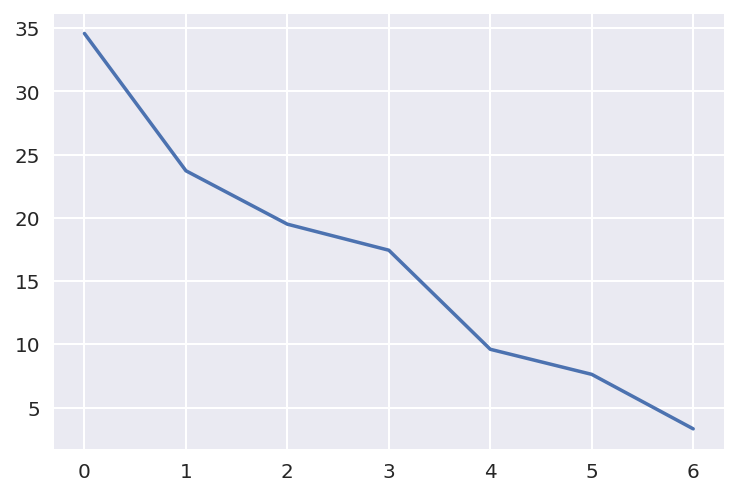

In [12]:
plt.plot(pca.singular_values_)

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.45909345,  0.67518696,  0.82119573,  0.93800003,  0.97344598,
        0.99577211,  1.        ])

Видим, что первая главная компонента "хранит" менее 50 % всей дисперсии, а первые две вместе &mdash; около двух третей.

Как правило, на практике этого бывает недостаточно.

In [8]:
use_data_2d = pca.transform(use_data_std)
use_data_2d[:10]

array([[ 2.18479652,  0.27055798],
       [ 7.47033353, -0.15566435],
       [ 1.58002345,  1.50514472],
       [-1.80207843,  0.74382665],
       [ 4.21303775, -2.54018996],
       [ 3.69587021, -2.77768281],
       [ 4.67074874, -4.68910086],
       [ 2.71420597, -3.92433792],
       [-0.2494322 ,  0.64712233],
       [ 1.2900554 ,  0.34871978]])

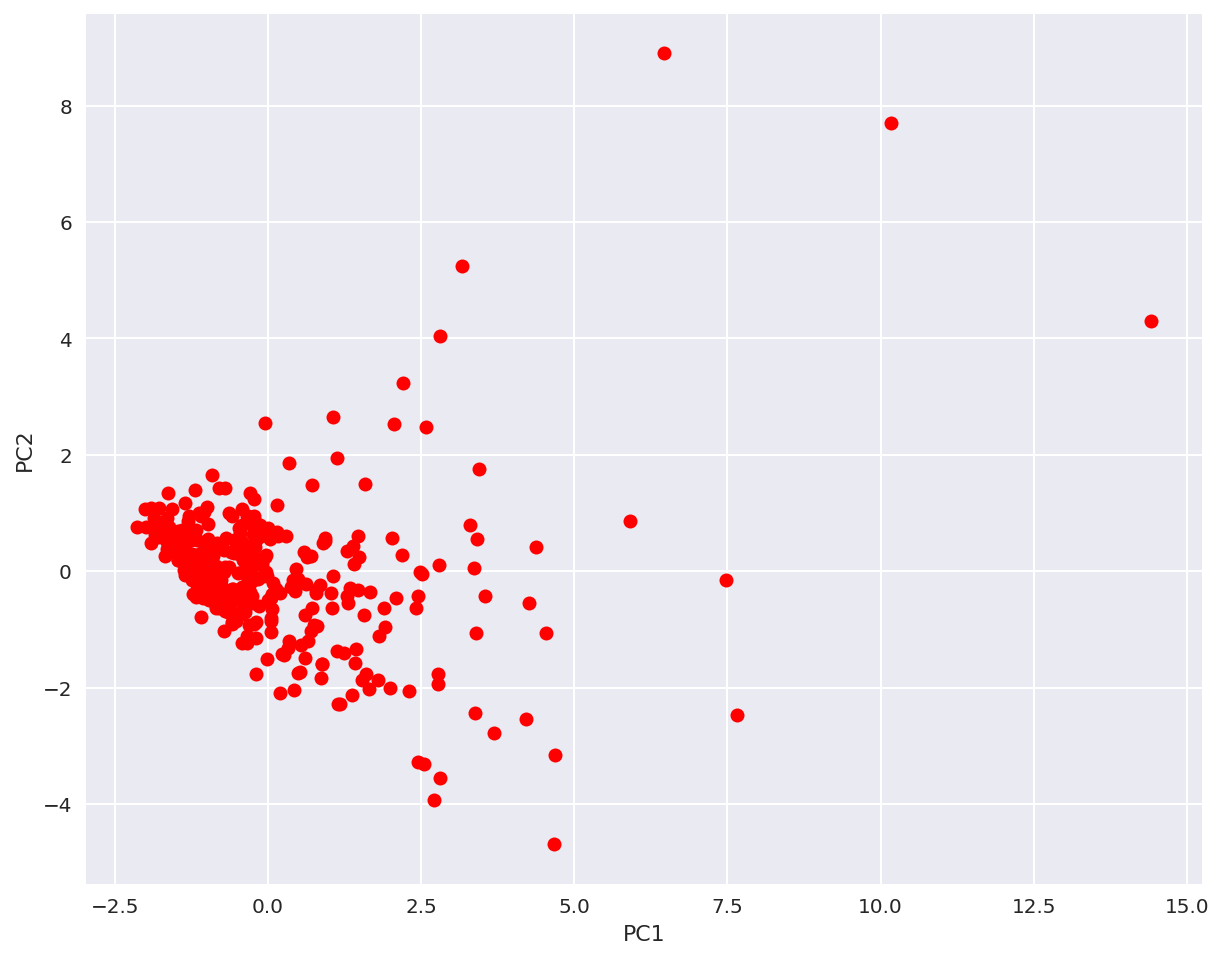

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(use_data_2d[:, 0], use_data_2d[:, 1], 'ro')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Найдём такое количество главных компонент (такую размерность подпространства), что объясняется не менее 80 % всей дисперсии.

In [11]:
pca_80 = PCA(0.8)
pca_80.fit(use_data_std)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca_80.explained_variance_ratio_

array([ 0.45909345,  0.21609352,  0.14600877])

Итак, нам необходимо взять три главные компоненты.

In [13]:
use_data_3d = pca_80.transform(use_data_std)
use_data_3d[:10]

array([[ 2.18479652,  0.27055798,  4.40952673],
       [ 7.47033353, -0.15566435,  6.15989591],
       [ 1.58002345,  1.50514472,  3.67606834],
       [-1.80207843,  0.74382665, -0.57725238],
       [ 4.21303775, -2.54018996,  1.42164019],
       [ 3.69587021, -2.77768281,  1.15192078],
       [ 4.67074874, -4.68910086,  0.68837084],
       [ 2.71420597, -3.92433792, -1.40577554],
       [-0.2494322 ,  0.64712233, -0.06148724],
       [ 1.2900554 ,  0.34871978, -0.81273553]])

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


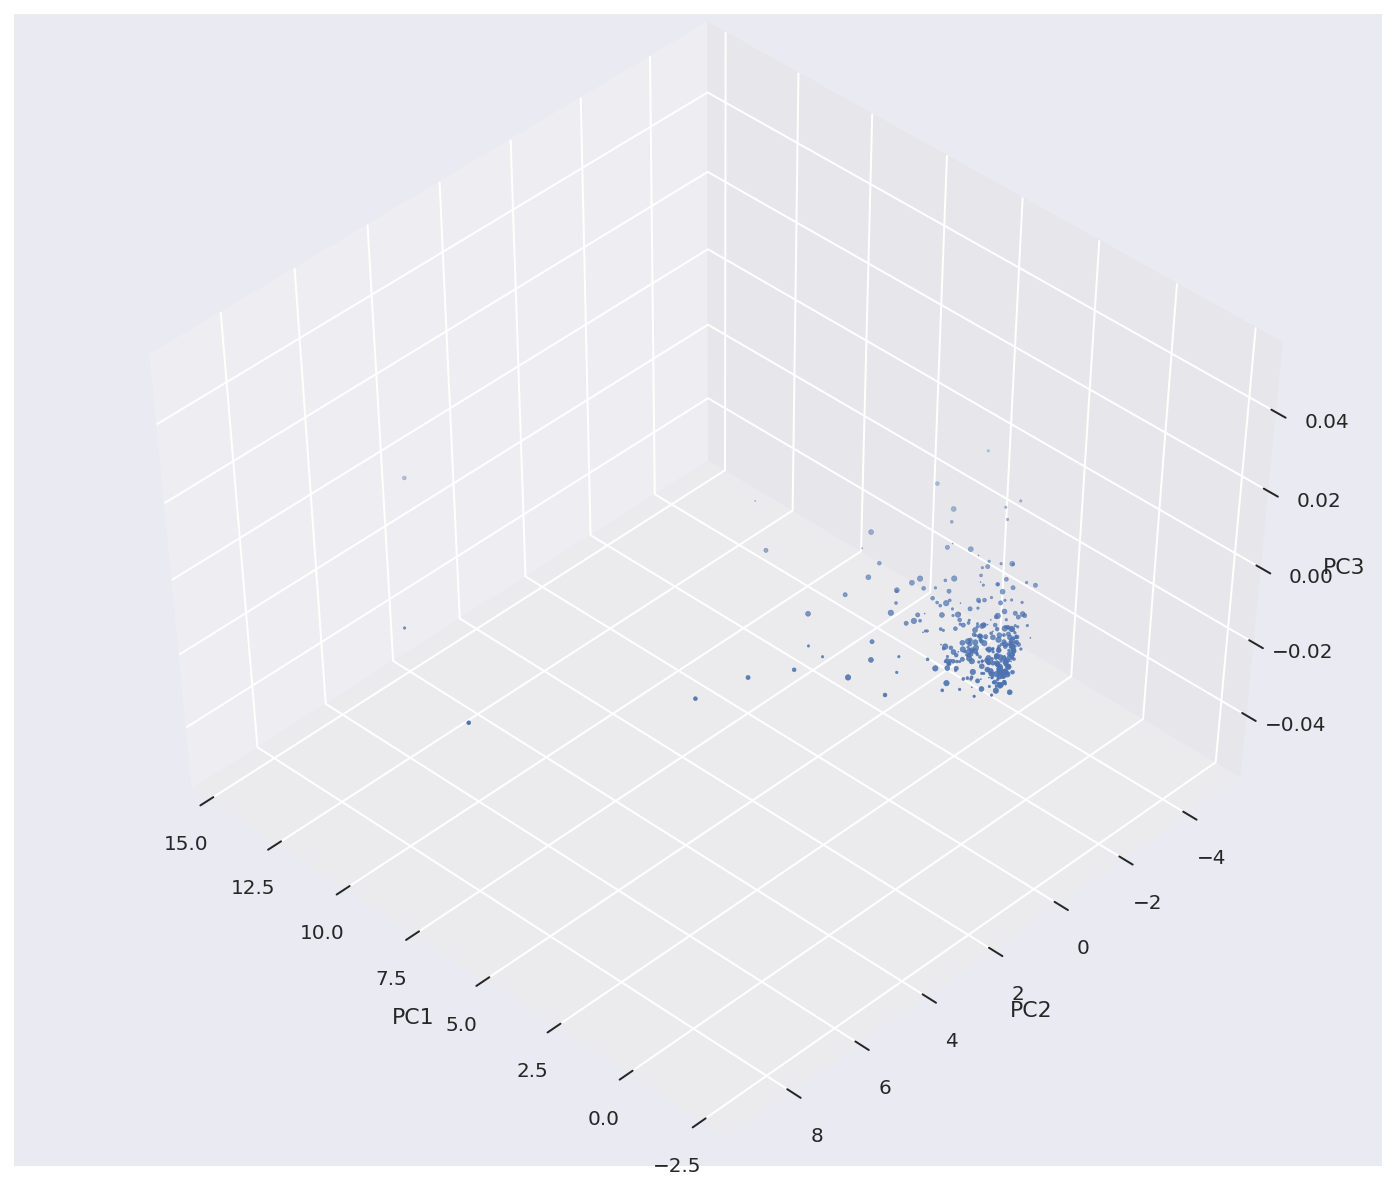

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.scatter(use_data_3d[:, 0], use_data_3d[:, 1], use_data_3d[:3], marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

Попробуем сделать интерпретацию полученных осей (главных компонент).

In [15]:
loadings = pca_80.components_.T * np.sqrt(pca_80.explained_variance_)
loadings

array([[ 0.83331825,  0.53305656, -0.05688249],
       [ 0.74868771,  0.60568883, -0.12047235],
       [ 0.91635399,  0.0560219 , -0.02976744],
       [ 0.68842267, -0.6512647 , -0.12003413],
       [ 0.42793514, -0.2113441 ,  0.47059452],
       [ 0.24093553, -0.03193449,  0.84296251],
       [ 0.64230433, -0.62670031, -0.24439262]])

In [16]:
loadings = pd.DataFrame(loadings)
loadings.columns = ['PC1', 'PC2', 'PC3']
loadings.index = ['V-'+str(i) for i in range(2, 9)]
loadings

PC1 
 PC2 
 PC3 
 
 
 
 
 V-2 
 0.833318 
 0.533057 
 -0.056882 
 
 
 V-3 
 0.748688 
 0.605689 
 -0.120472 
 
 
 V-4 
 0.916354 
 0.056022 
 -0.029767 
 
 
 V-5 
 0.688423 
 -0.651265 
 -0.120034 
 
 
 V-6 
 0.427935 
 -0.211344 
 0.470595 
 
 
 V-7 
 0.240936 
 -0.031934 
 0.842963 
 
 
 V-8 
 0.642304 
 -0.626700 
 -0.244393

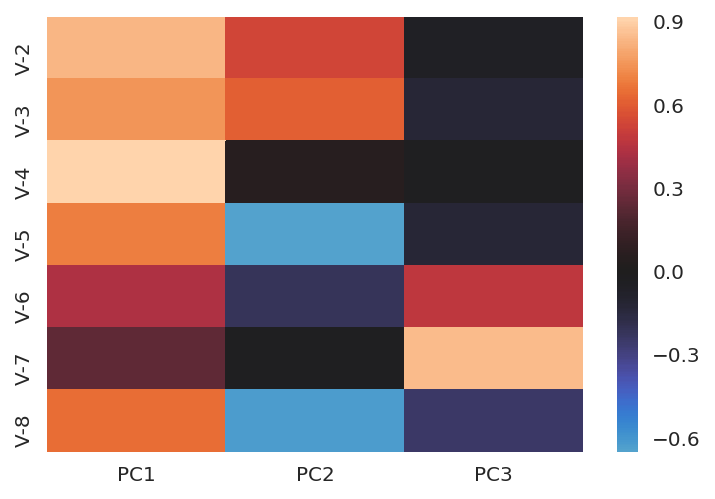

In [17]:
sns.heatmap(loadings, center=0.0)

Можем предположить, что первая главная компонента характеризует **величину здания**, а третья показывает **длительность строительства**. Интерпретировать вторую ось здесь достаточно сложно.